In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
Training_data=pd.read_csv("trainKNN.txt")
Test_data=pd.read_csv("testKNN.txt",)

In [3]:
Training_data.head()

,ID number,RI,NA,MG,AL,SI,K,CA,BA,FE,TypeofGlass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
Test_data.head()

,ID number,RI,NA,MG,AL,SI,K,CA,BA,FE,TypeofGlass
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [5]:
#replacing 0s with null values:
Training_data.FE.replace(0,np.nan,inplace=True)
Training_data.BA.replace(0,np.nan,inplace=True)
Training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID number    196 non-null    int64  
 1   RI           196 non-null    float64
 2   NA           196 non-null    float64
 3   MG           196 non-null    float64
 4   AL           196 non-null    float64
 5   SI           196 non-null    float64
 6   K            196 non-null    float64
 7   CA           196 non-null    float64
 8   BA           33 non-null     float64
 9   FE           61 non-null     float64
 10  TypeofGlass  196 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 17.0 KB


In [6]:
Training_data.isnull().sum()/len(Test_data)*100

ID number        0.000000
RI               0.000000
NA               0.000000
MG               0.000000
AL               0.000000
SI               0.000000
K                0.000000
CA               0.000000
BA             905.555556
FE             750.000000
TypeofGlass      0.000000
dtype: float64

In [7]:
Training_data=Training_data.drop(['FE',"BA"],axis=1)

In [8]:
Training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID number    196 non-null    int64  
 1   RI           196 non-null    float64
 2   NA           196 non-null    float64
 3   MG           196 non-null    float64
 4   AL           196 non-null    float64
 5   SI           196 non-null    float64
 6   K            196 non-null    float64
 7   CA           196 non-null    float64
 8   TypeofGlass  196 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.9 KB


[]

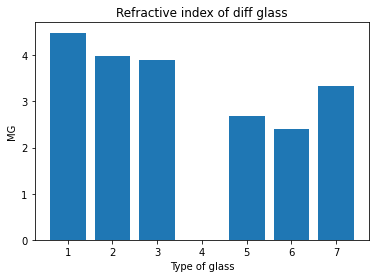

In [9]:
#plotting 
plt.bar(Training_data.TypeofGlass,Training_data.MG)
plt.xlabel("Type of glass")
plt.ylabel('MG')
plt.title('Refractive index of diff glass')
plt.plot()

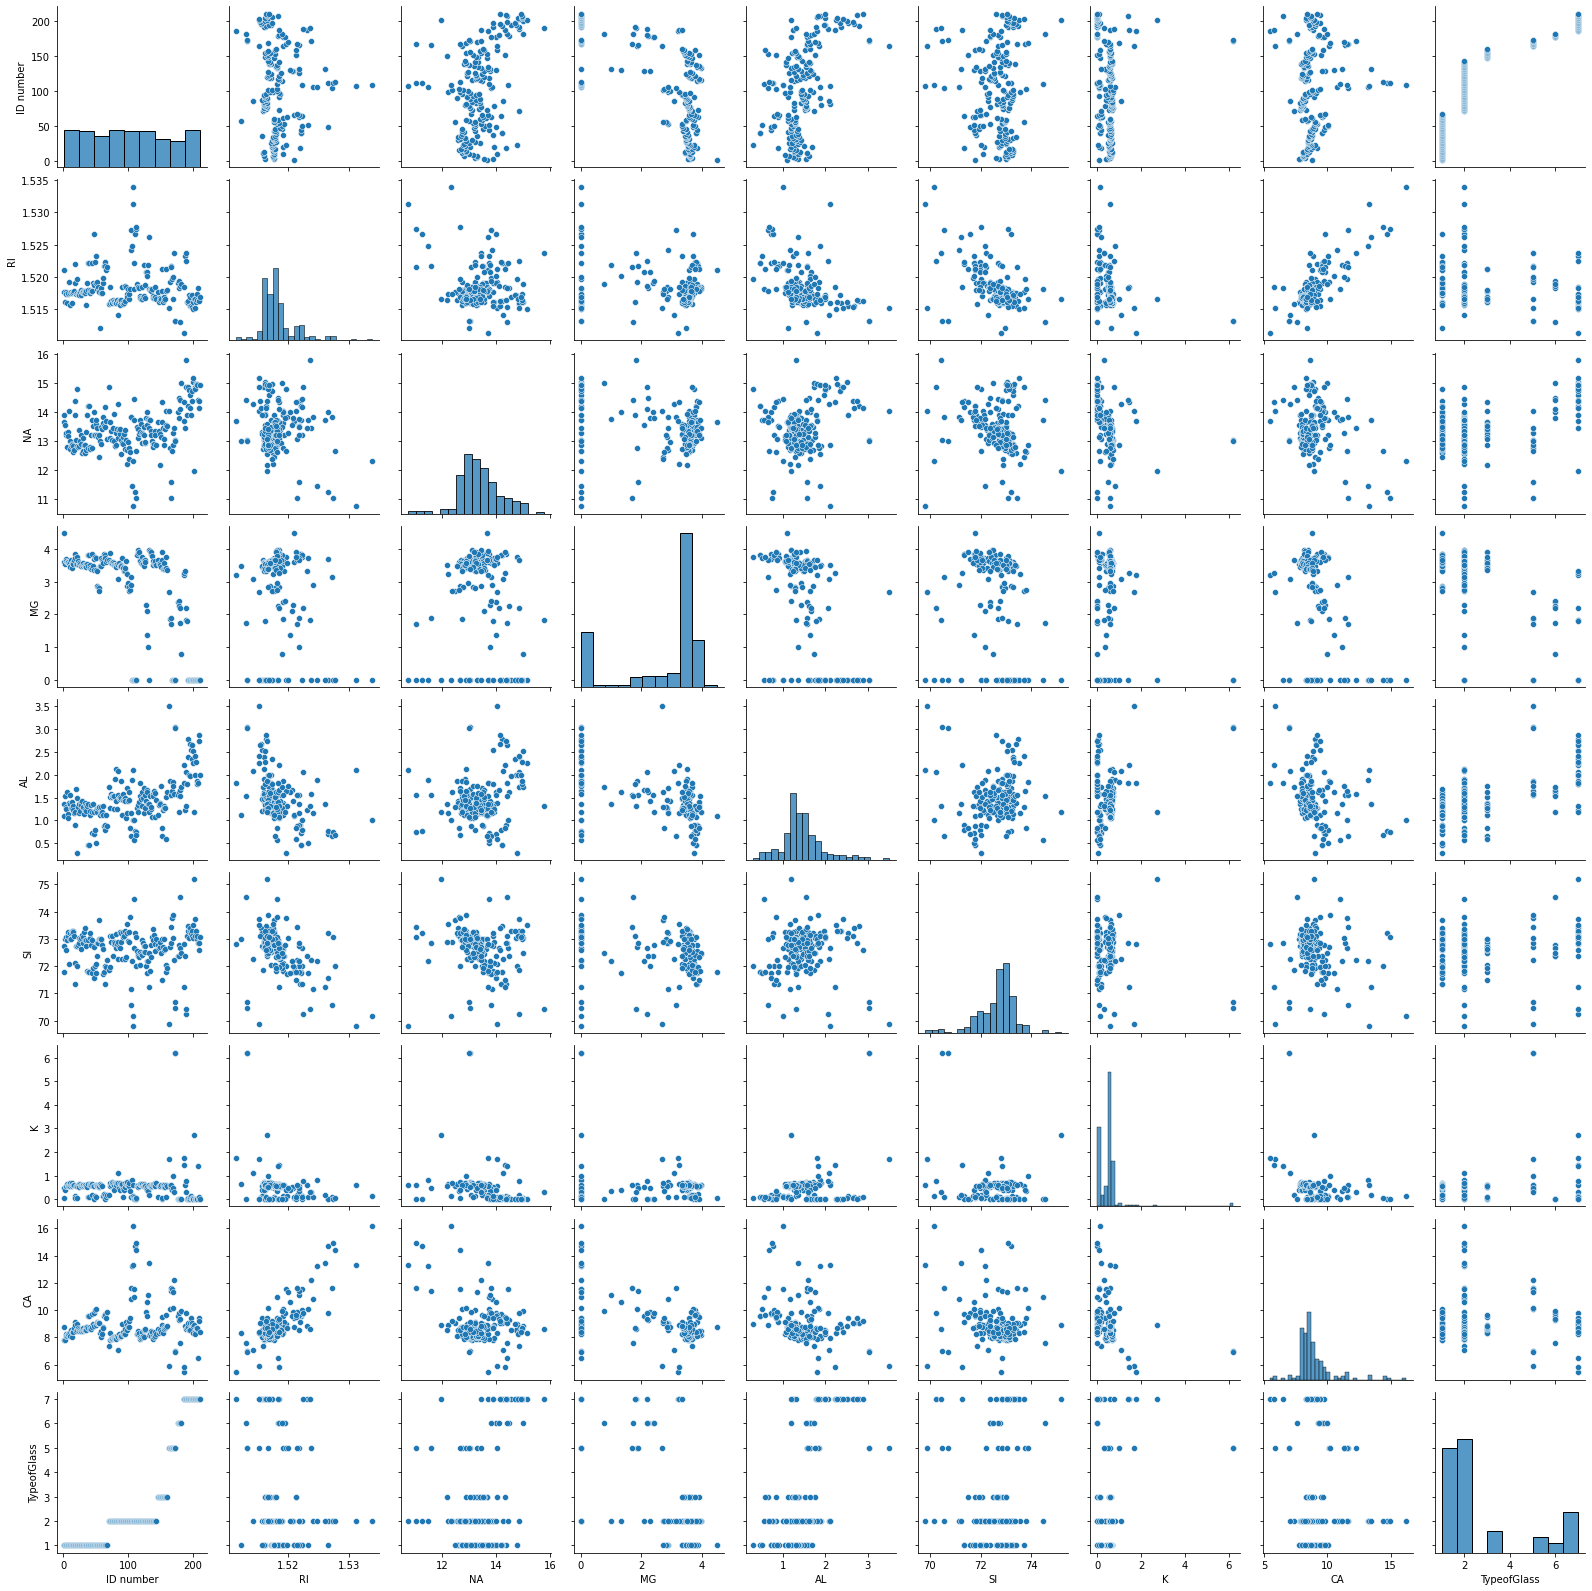

In [10]:
sns.pairplot(Training_data)

/Users/jijujoseph/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TypeofGlass', ylabel='Density'>

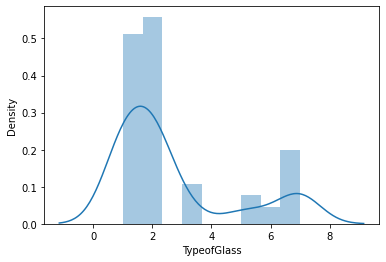

In [11]:
sns.distplot(Training_data["TypeofGlass"])

In [12]:
#negative values show negative correlation
Training_data.corr()

,ID number,RI,NA,MG,AL,SI,K,CA,TypeofGlass
ID number,1.000000,-0.073356,0.354835,-0.634686,0.529855,0.012142,0.039460,0.080707,0.876191
RI,-0.073356,1.000000,-0.158559,-0.153610,-0.446641,-0.530520,-0.296570,0.821277,-0.166670
NA,0.354835,-0.158559,1.000000,-0.216384,0.234219,-0.196462,-0.248626,-0.278983,0.484154
MG,-0.634686,-0.153610,-0.216384,1.000000,-0.520530,-0.095263,-0.039185,-0.461244,-0.714713
AL,0.529855,-0.446641,0.234219,-0.520530,1.000000,0.010147,0.335160,-0.284701,0.640944
SI,0.012142,-0.530520,-0.196462,-0.095263,0.010147,1.000000,-0.181488,-0.197767,0.092812
K,0.039460,-0.296570,-0.248626,-0.039185,0.335160,-0.181488,1.000000,-0.321540,0.029423
CA,0.080707,0.821277,-0.278983,-0.461244,-0.284701,-0.197767,-0.321540,1.000000,-0.019545
TypeofGlass,0.876191,-0.166670,0.484154,-0.714713,0.640944,0.092812,0.029423,-0.019545,1.000000


1.we can see that Calcium content and Refractive Index have a reallly high positive correlation.
2.ID number and Type of glass has a high correlation
3.ALuminum and Type of glass has decent correlation
4.NA and Type of glass has a positive correlation
5.MG and Type of glass has a negative correlation
6.RI and SI AND AL have more than 50% negative correlation


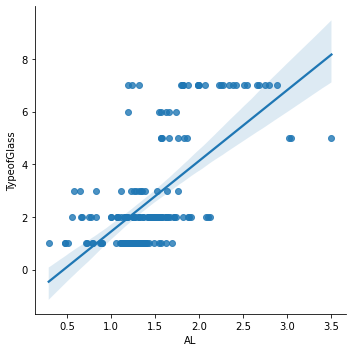

In [13]:
sns.lmplot(x='AL',y='TypeofGlass',data=Training_data);

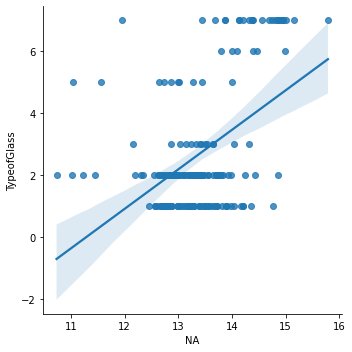

In [14]:
sns.lmplot(x='NA',y='TypeofGlass',data=Training_data);

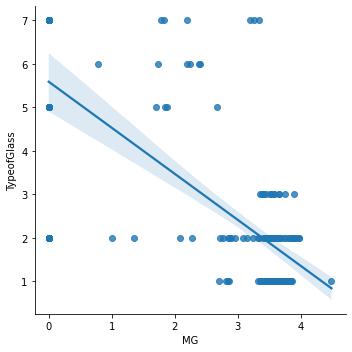

In [15]:
sns.lmplot(x='MG',y='TypeofGlass',data=Training_data);

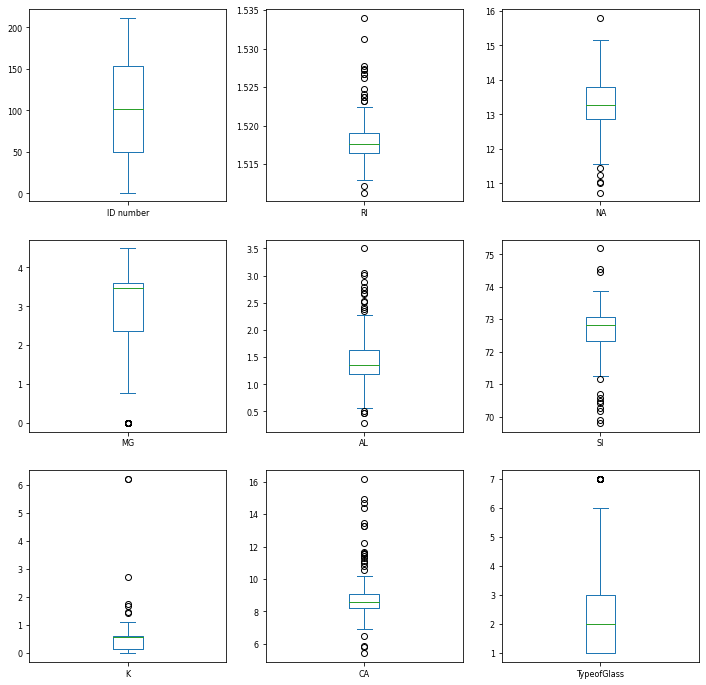

In [16]:
#Checking for outliers:
Training_data.plot(kind='box',subplots=True,layout=(3,3),fontsize=8,figsize=(12,12));

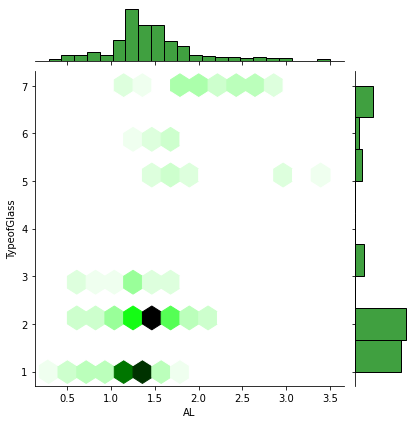

In [17]:
sns.jointplot(x="AL",y='TypeofGlass',data=Training_data,kind='hex',color='g')

In [18]:
Training_data1=Training_data.drop(["TypeofGlass"],axis=1)

In [19]:
X_train=Training_data1

In [20]:
X_train.shape

(196, 8)

In [21]:
Y_train=Training_data["TypeofGlass"]

In [22]:
Test_data1=Test_data.drop(["TypeofGlass","BA","FE"],axis=1)

In [23]:
X_test=Test_data1
X_test.shape

(18, 8)

In [24]:
Y_test=Test_data["TypeofGlass"]

In [25]:
Y_test

0     1
1     1
2     1
3     2
4     2
5     2
6     3
7     3
8     3
9     5
10    5
11    5
12    6
13    6
14    6
15    7
16    7
17    7
Name: TypeofGlass, dtype: int64

In [26]:
#removing outliers from the data
L=["ID number","RI","NA","MG","AL","SI","K","CA","BA","FE","TypeofGlass"]

In [27]:
X_train.describe()

,ID number,RI,NA,MG,AL,SI,K,CA
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,102.862245,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714
std,61.195663,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490
min,1.000000,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000
25%,49.750000,1.516457,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000
50%,101.500000,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000
75%,153.250000,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500
max,211.000000,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000


In [28]:
#function to get outliers:
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    
    LB=Q1-1.5 * IQR
    UB=Q3+1.5 *IQR
    
    LS=df[ (df[ft]<LB) | (df[ft]>UB) ].index
    return LS 

In [29]:
#List to store indices from all columns containing outliers
index_list=[]
for x in ["RI","NA","MG","AL","SI","K","CA"]:
    index_list.extend(outliers(X_train,x))

In [30]:
#remove function to return the cleaned dataframe
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [31]:
df_cleaned=remove(X_train,index_list)

In [32]:
X_train_cleaned=df_cleaned

In [33]:
X_train_cleaned.head()

,ID number,RI,NA,MG,AL,SI,K,CA
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07


In [34]:
X_train.shape

(196, 8)

In [35]:
X_train_cleaned.shape

(142, 8)

In [36]:
Y_train_Cleaned=remove(Y_train,index_list)

reference for Cleaning:
https://www.youtube.com/watch?v=lL_1d4a2NDA

In [37]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(n_neighbors=1,metric='manhattan')

In [38]:
model.fit(X_train_cleaned,Y_train_Cleaned)

KNeighborsRegressor(metric='manhattan', n_neighbors=1)

In [39]:
model.predict(X_test)

array([1., 1., 1., 2., 2., 3., 3., 3., 3., 6., 6., 6., 6., 6., 6., 7., 7.,
       7.])

In [40]:
Y_test

0     1
1     1
2     1
3     2
4     2
5     2
6     3
7     3
8     3
9     5
10    5
11    5
12    6
13    6
14    6
15    7
16    7
17    7
Name: TypeofGlass, dtype: int64

In [41]:
model=KNeighborsRegressor(n_neighbors=1,metric='euclidean')
model.fit(X_train_cleaned,Y_train_Cleaned)
model.predict(X_test)

array([1., 1., 2., 2., 2., 3., 3., 3., 3., 6., 6., 6., 6., 6., 6., 7., 7.,
       7.])

In [42]:
Y_test

0     1
1     1
2     1
3     2
4     2
5     2
6     3
7     3
8     3
9     5
10    5
11    5
12    6
13    6
14    6
15    7
16    7
17    7
Name: TypeofGlass, dtype: int64

In [43]:
#Checking the accuracy of our model
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, model.predict(X_test),normalize=True, sample_weight=None)

0.7222222222222222